# Data Communication Computer Assignment 
## using Lloyds Algorithm for Source Quantization with Gaussian Distribution    

### Safora Alavipanah                                                                                                                                        810100254

#### 1. importing Libraries and  initializing parameters :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

max_iter=100
tol=1e-5

#### 2. Function to plot the boundary and representatives updates:

In [2]:
def plot_all_iterations(samples, all_boundaries, all_representatives):
    
    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins=50, density=True, alpha=0.5, color='skyblue', label='Sample Distribution')
    
    # Plot boundaries and representatives for each iteration
    num_iterations = len(all_representatives)
    colors = plt.cm.viridis(np.linspace(0, 1, num_iterations))  # Color map for iteration progression

    for i, (boundaries, representatives) in enumerate(zip(all_boundaries, all_representatives)):
        # Plot boundaries
        for b in boundaries:
            if b != -np.inf and b != np.inf:
                plt.axvline(x=b, color=colors[i], linestyle='--', linewidth=1, alpha=0.5)

        # Plot representative points
        plt.scatter(representatives, np.zeros_like(representatives), color=colors[i], s=50, marker='x', label=f'Iteration {i + 1}' if i % 5 == 0 else "")
    
    # Plot theoretical Gaussian distribution
    x = np.linspace(-4 * sigma, 4 * sigma, 1000)
    pdf = (1 / (np.sqrt(2 * np.pi * sigma ** 2))) * np.exp(-x ** 2 / (2 * sigma ** 2))
    plt.plot(x, pdf, color='blue', linewidth=2, label='Theoretical Gaussian PDF')
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Gaussian Distribution with Quantization Boundaries and Representatives Across Iterations')
    plt.legend()
    
    plt.show()


#### 3. Gaussian Distribiution source Quantization:

In [5]:
def compute_optimal_representative(samples, lower_bound, upper_bound):
    
    # Filter samples within the region
    region_samples = samples[(samples >= lower_bound) & (samples < upper_bound)]
    
    if len(region_samples) == 0:
        return None  # No samples in this region
    
    # Solve the MSE minimization explicitly (same as computing the mean)
    optimal_representative = np.sum(region_samples) / len(region_samples)
    return optimal_representative


def gaussian_quantizer(b, sigma):
    
    # quantization areas 
    num_regions = 2 ** b
    # gaussian normal distribiution sample maker
    samples = np.random.normal(0, sigma, 10000)
    
    #plot histogram 
    #gaussian_plot(samples , sigma)
    
    # initialization 
    boundaries = np.linspace(-3*sigma, 3*sigma, num_regions + 1)
    representatives = np.array([(boundaries[i] + boundaries[i+1]) / 2 for i in range(num_regions)])
    
    # Lists to store boundaries and representatives across iterations
    all_boundaries = [boundaries.copy()]
    all_representatives = [representatives.copy()]
    
    for iteration in range(max_iter):
        # representatives update
        new_representatives = np.array([
            compute_optimal_representative(samples, boundaries[i], boundaries[i + 1])
            for i in range(num_regions)
        ])
        
        # boundary update
        new_boundaries = np.array([
            (new_representatives[i] + new_representatives[i+1]) / 2
            for i in range(num_regions - 1)
        ])
        new_boundaries = np.concatenate(([-np.inf], new_boundaries, [np.inf]))
        
        # Store the updated boundaries and representatives
        all_boundaries.append(new_boundaries.copy())
        all_representatives.append(new_representatives.copy())
        
        
        # Convergence check
        if np.all(np.abs(new_representatives - representatives) < tol):
            print(f"Converged in {iteration + 1} iterations.")
            break
            
        representatives = new_representatives
        boundaries = new_boundaries
        
    #plot boundaries and representatives on one plot    
    plot_all_iterations(samples, all_boundaries, all_representatives)
   
    return representatives, boundaries

#### 4. call :

Converged in 44 iterations.


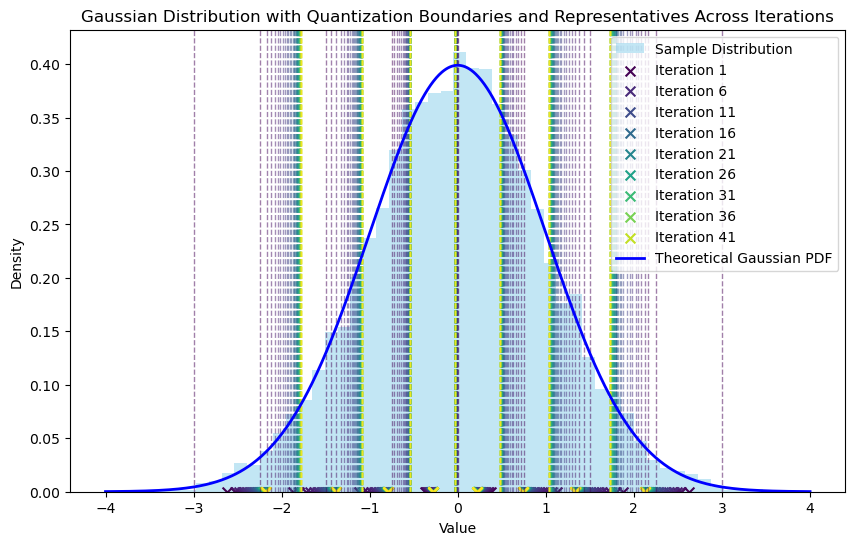

Representative points: [-2.17993234 -1.37964532 -0.79060757 -0.28630578  0.21918453  0.74042128
  1.33347485  2.12563302]
Boundaries: [       -inf -1.77978883 -1.08512645 -0.53845668 -0.03356063  0.4798029
  1.03694806  1.72955393         inf]


In [6]:
b = 3  # bits
sigma = 1.0  #deviation

representatives, boundaries = gaussian_quantizer(b, sigma)
print("Representative points:", representatives)
print("Boundaries:", boundaries)


## Results :
#### The vertical dashed lines represent the quantization boundaries at each iteration of the Lloyd's algorithm.
#### Each color corresponds to boundaries from different iterations, progressing through a color gradient as the algorithm refines the boundaries.
#### These boundaries indicate the points where the algorithm divides the sample space, aiming to minimize the quantization error in each region.
#### The colored "x" markers along the x-axis represent the representative points (centroids) for each quantization region in different iterations.
#### The markers show how these points shift closer to the center of each quantization region as the algorithm converges.
#### The labels in the legend (e.g., "Iteration 1," "Iteration 6," "Iteration 11," "Iteration 16") show the progression of iterations.
#### Initially, the boundaries and representatives are farther apart, and as the iterations progress, they gradually adjust and converge to stable positions.
#### The algorithm converged after 18 iterations, meaning the representatives and boundaries stabilized, and further iterations did not significantly change them.
#### The final representative points and boundaries are printed at the bottom. 